#### v2.0 绘制实验总图

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy import stats
import statistics
from matplotlib.patches import FancyArrow
import json

plt.rcParams['figure.dpi'] = 900

# 将X/Y轴的刻度线方向设置向内
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# 设置字体
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Microsoft Yahei'

# 设置公式字体
config = {
    "mathtext.fontset": 'stix',
}
rcParams.update(config)


def count_bins(number):
    n_string = '{:.15f}'.format(number)
    decimal_part = str(n_string).split('.')[1]  # 将小数部分转换为字符串并分割
    count = 0
    for digit in decimal_part:
        if digit == '0':
            count += 1
        else:
            break  # 遇到第一个非零数字就停止计数
    return count + 1


# Michel 2007 计算频区间的中心值
def get_center_value(freqs):
    maxi = np.log10(max(freqs))
    minu = np.log10(min(freqs))
    center = (maxi + minu) / 2  # logarithmic mean 对数均值
    return 10**center

In [4]:
# 绘制词频区间与词组数量的关系(Zipf's law)
def plotInnerPanelA(ax, center_of_bins, coverage_of_bins, frequency_of_bins, xlims):
    X_, Y_ = [], []
    centers = []
    
    for x,y,freqs in zip(center_of_bins, coverage_of_bins, frequency_of_bins):
        if y == 0:
            continue
        X_.append(x)
        Y_.append(y)
        # centers.append(get_center_value(freqs))
        centers.append(x)
    # print(X_, Y_)
    # print(centers)

    ax.plot(centers, Y_, color='#6671b5', linewidth=1.5, alpha=0.8, marker='o', markersize=4)

    ax.set_xscale('log')
    # ax.set_yscale('log')
    # 逆转 x 轴
    ax.invert_xaxis()

    minu_freq, maxi_freq = xlims
    ax.set_xlim(10**(np.log10(maxi_freq)*0.6), 10**(np.log10(minu_freq)*1.06))
    minu_number, maxi_number =np.min(coverage_of_bins), np.max(coverage_of_bins)
    ax.set_ylim(minu_number-maxi_number*0.2, maxi_number*1.2)

    # ax.set_xticks([1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7])
    # ax.set_yticks([50, 150, 250])
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

    ax.set_xlabel('Frequency (log)', fontsize=10)
    ax.set_ylabel('Number of phrases', fontsize=10)
    ax.legend(loc='lower left', bbox_to_anchor=(0.05, 0.05), frameon=False, fontsize=10, labelspacing=0.3, handletextpad=1, handlelength=1.6)
    ax.tick_params(top='on', right='on', which='both')
    
def plotInnerPanelB(ax, special_phas_Weber, special_phas_Oxford):
    start_year, end_year = 1800, 2020
    sm = 8
    df_freqs = pd.read_csv('./data/languages_smoothing('+str(sm)+')/English_latin frequency(2135)_smoothing('+str(sm)+').csv').iloc[start_year-1500:, :]
    df_Weber_freqs = df_freqs.loc[:, special_phas_Weber]
    df_Oxford_freqs = df_freqs.loc[:, special_phas_Oxford]

    # colors = ['#f79779', '#6671b5']
    colors = ['#6671b5', '#f79779']
    label_messages = ['Merriam-Webster Dictionary', 'Oxford English Dictionary']
    years = list(range(start_year, 2020))
                
    for i, df_freqs in enumerate([df_Weber_freqs, df_Oxford_freqs]):
        # if i==0:
        #     continue
        frequency = []
        for j in range(df_freqs.shape[0]):
            med_freq = np.median(df_freqs.iloc[j, :])
            frequency.append(med_freq)
        sliced_year = [years[k:k+10] for k in range(0, len(years), 10)]
        sliced_frequency = [frequency[k:k+10] for k in range(0, len(frequency), 10)]
        # print(len(sliced_frequency), sliced_frequency)
        
        X_, Y_ = [], []
        for k, (ys, fs) in enumerate(zip(sliced_year, sliced_frequency)):
            X_.append(np.median(ys))
            Y_.append(np.median(fs))
        # print(X_, Y_)
        ax.plot(X_, Y_, color=colors[i], linewidth=1.5, alpha=0.8, marker='o', markersize=2.5, label=label_messages[i])

    ax.margins(0)
    ax.set_xlim(start_year-5, end_year+5)
    ax.set_ylim(0.5e-8, 4.2e-8)
    
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    
    ax.set_xlabel('Decade', fontsize=10)
    ax.set_ylabel('Frequency (en-2019)', fontsize=10)
    # ax.legend(loc='lower left', bbox_to_anchor=(0.05, 0.05), frameon=False, fontsize=10, labelspacing=0.3, handletextpad=1, handlelength=1.6)
    ax.tick_params(top='on', right='on', which='both')

In [5]:
center_of_bins = [5e-1, 5e-2, 5e-3, 5e-4, 5e-5, 5e-6, 5e-7, 5e-8, 5e-9, 5e-10, 5e-11]

number_of_bins = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
coverage_of_bins = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
frequency_of_bins = [[[], [], [], [], [], [], [], [], [], [], []], [[], [], [], [], [], [], [], [], [], [], []]]
coverage_rate = [[], []]
file_paths = ["./data/data analysis v2.0/verify in Weber v2.0.csv", "./data/data analysis v2.0/verify in Oxford v2.0.csv"]

minu_freq, maxi_freq = 0, 0

for i, file_path in enumerate(file_paths):
    df_ = pd.read_csv(file_path)
    minu_freq = np.min(df_['frequency'])
    maxi_freq = np.max(df_['frequency'])
    for (pha, freq, inDict) in zip(df_['phrase'],  df_['frequency'], df_['inDict']):
        # 判断词频属于哪个箱子
        index_of_bins = count_bins(freq) -1
        
        number_of_bins[i][index_of_bins] += 1
        if inDict == 1:
            coverage_of_bins[i][index_of_bins] += 1
            frequency_of_bins[i][index_of_bins].append(freq)
            
    print(number_of_bins[i])
    print(coverage_of_bins[i])
    # print(frequency_of_bins[i])
    
    for x, y in zip(coverage_of_bins[i], number_of_bins[i]):
        if y == 0:
            coverage_rate[i].append(0)
        else:
            coverage_rate[i].append(x/y)
    print('coverage rate: ', coverage_rate[i])

[0, 0, 3, 23, 84, 162, 422, 548, 399, 0, 0]
[0, 0, 3, 23, 82, 134, 277, 212, 73, 0, 0]
coverage rate:  [0, 0, 1.0, 1.0, 0.9761904761904762, 0.8271604938271605, 0.6563981042654028, 0.38686131386861317, 0.18295739348370926, 0, 0]
[0, 0, 3, 23, 84, 162, 422, 548, 399, 0, 0]
[0, 0, 3, 23, 78, 130, 220, 94, 13, 0, 0]
coverage rate:  [0, 0, 1.0, 1.0, 0.9285714285714286, 0.8024691358024691, 0.5213270142180095, 0.17153284671532848, 0.03258145363408521, 0, 0]


#### 合并图例

In [6]:
def plotSubpanelA(ax, center_of_bins, coverage_of_bins, frequency_of_bins, colors, label_messages):
    for i in range(2):
        X_, Y_ = [], []
        centers = []
        for x,y,freqs in zip(center_of_bins, coverage_rate[i], frequency_of_bins[i]):
            if y == 0:
                continue
            X_.append(x)
            Y_.append(y)
            # centers.append(get_center_value(freqs))
            centers.append(x)
        # print(X_, Y_)
        # print(centers)
        ax.plot(centers, Y_, color=colors[i], linewidth=3, alpha=0.8, marker='o', markersize=8, label=label_messages[i])
        print(centers, Y_)

    ax.set_xscale('log')
    ax.set_yscale('log')
    # 逆转 x 轴
    ax.invert_xaxis()
    # 设置y轴的百分数格式
    from matplotlib.ticker import FuncFormatter
    def percent_formatter(x, pos):
        return f'{x*100:.0f}%'
    ax.yaxis.set_major_formatter(FuncFormatter(percent_formatter))


    # 添加一个子图案例
    sub_ax = ax.inset_axes([0.15, 0.45, 0.3, 0.3])
    plotInnerPanelA(sub_ax, center_of_bins, number_of_bins[0], frequency_of_bins[0], [minu_freq, maxi_freq])

    ax.set_xlim(10**(np.log10(maxi_freq)*0.6), 10**(np.log10(minu_freq)*1.05))
    ax.set_ylim(0.02, 1.4)

    ax.set_xlabel('Frequency (log)', fontsize=14)
    ax.set_ylabel('Dictionary coverage', fontsize=14)
    ax.tick_params(axis='x', labelsize=12) 
    ax.tick_params(axis='y', labelsize=12)  
    ax.legend(loc='lower left', bbox_to_anchor=(0.02, 0.02), frameon=False, fontsize=10, labelspacing=0.3, handletextpad=1, handlelength=1.6)
    ax.tick_params(top='on', right='on', which='both')

def plotSubpanelB(ax, center_of_bins, coverage_of_bins, frequency_of_bins, colors, label_messages):
    maxi, minu = np.max(coverage_of_bins[0]), np.min(coverage_of_bins[0])
    for i in range(2):
        X_, Y_ = [], []
        centers = []
        for x,y,freqs in zip(center_of_bins, coverage_of_bins[i], frequency_of_bins[i]):
            if y == 0:
                continue
            X_.append(x)
            Y_.append(y)
            # centers.append(get_center_value(freqs))
            centers.append(x)
        ax.plot(centers, Y_, color=colors[i], linewidth=3, alpha=0.8, marker='o', markersize=8, label=label_messages[i])
        print(centers, Y_)

    ax.set_xscale('log')
    # # 逆转 x 轴
    ax.invert_xaxis()
    
    ax.set_xlim(10**(np.log10(maxi_freq)*0.6), 10**(np.log10(minu_freq)*1.05))
    ax.set_ylim(minu-maxi*0.1, maxi*1.15)

    ax.set_xlabel('Frequency (log)', fontsize=14)
    ax.set_ylabel('Number of covered phrases', fontsize=14)
    ax.tick_params(axis='x', labelsize=12) 
    ax.tick_params(axis='y', labelsize=12)  
    ax.legend(loc='lower left', bbox_to_anchor=(0.02, 0.8), frameon=False, fontsize=10, labelspacing=0.3, handletextpad=1, handlelength=1.6)
    ax.tick_params(top='on', right='on', which='both')
    
    
    df_Weber = pd.read_csv('./data/data analysis v2.0/verify in Weber v2.0.csv')
    df_Oxford = pd.read_csv('./data/data analysis v2.0/verify in Oxford v2.0.csv')
    special_phas_Weber = []
    for pha_Weber, inDict_Weber in zip(df_Weber['phrase'], df_Weber['inDict']):
        if inDict_Weber == 1:
                special_phas_Weber.append(pha_Weber)
    special_phas_Oxford = []
    for pha_Oxford, inDict_Oxford in zip(df_Oxford['phrase'], df_Oxford['inDict']):
        if inDict_Oxford == 1:
                special_phas_Oxford.append(pha_Oxford)
    # 添加一个子图案例
    sub_ax = ax.inset_axes([0.11, 0.45, 0.3, 0.3])
    plotInnerPanelB(sub_ax, special_phas_Weber, special_phas_Oxford)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.005, 0.0005, 5e-05, 5e-06, 5e-07, 5e-08, 5e-09] [1.0, 1.0, 0.9761904761904762, 0.8271604938271605, 0.6563981042654028, 0.38686131386861317, 0.18295739348370926]
[0.005, 0.0005, 5e-05, 5e-06, 5e-07, 5e-08, 5e-09] [1.0, 1.0, 0.9285714285714286, 0.8024691358024691, 0.5213270142180095, 0.17153284671532848, 0.03258145363408521]
[0.005, 0.0005, 5e-05, 5e-06, 5e-07, 5e-08, 5e-09] [3, 23, 82, 134, 277, 212, 73]
[0.005, 0.0005, 5e-05, 5e-06, 5e-07, 5e-08, 5e-09] [3, 23, 78, 130, 220, 94, 13]


Text(0.503, 0.945, 'b')

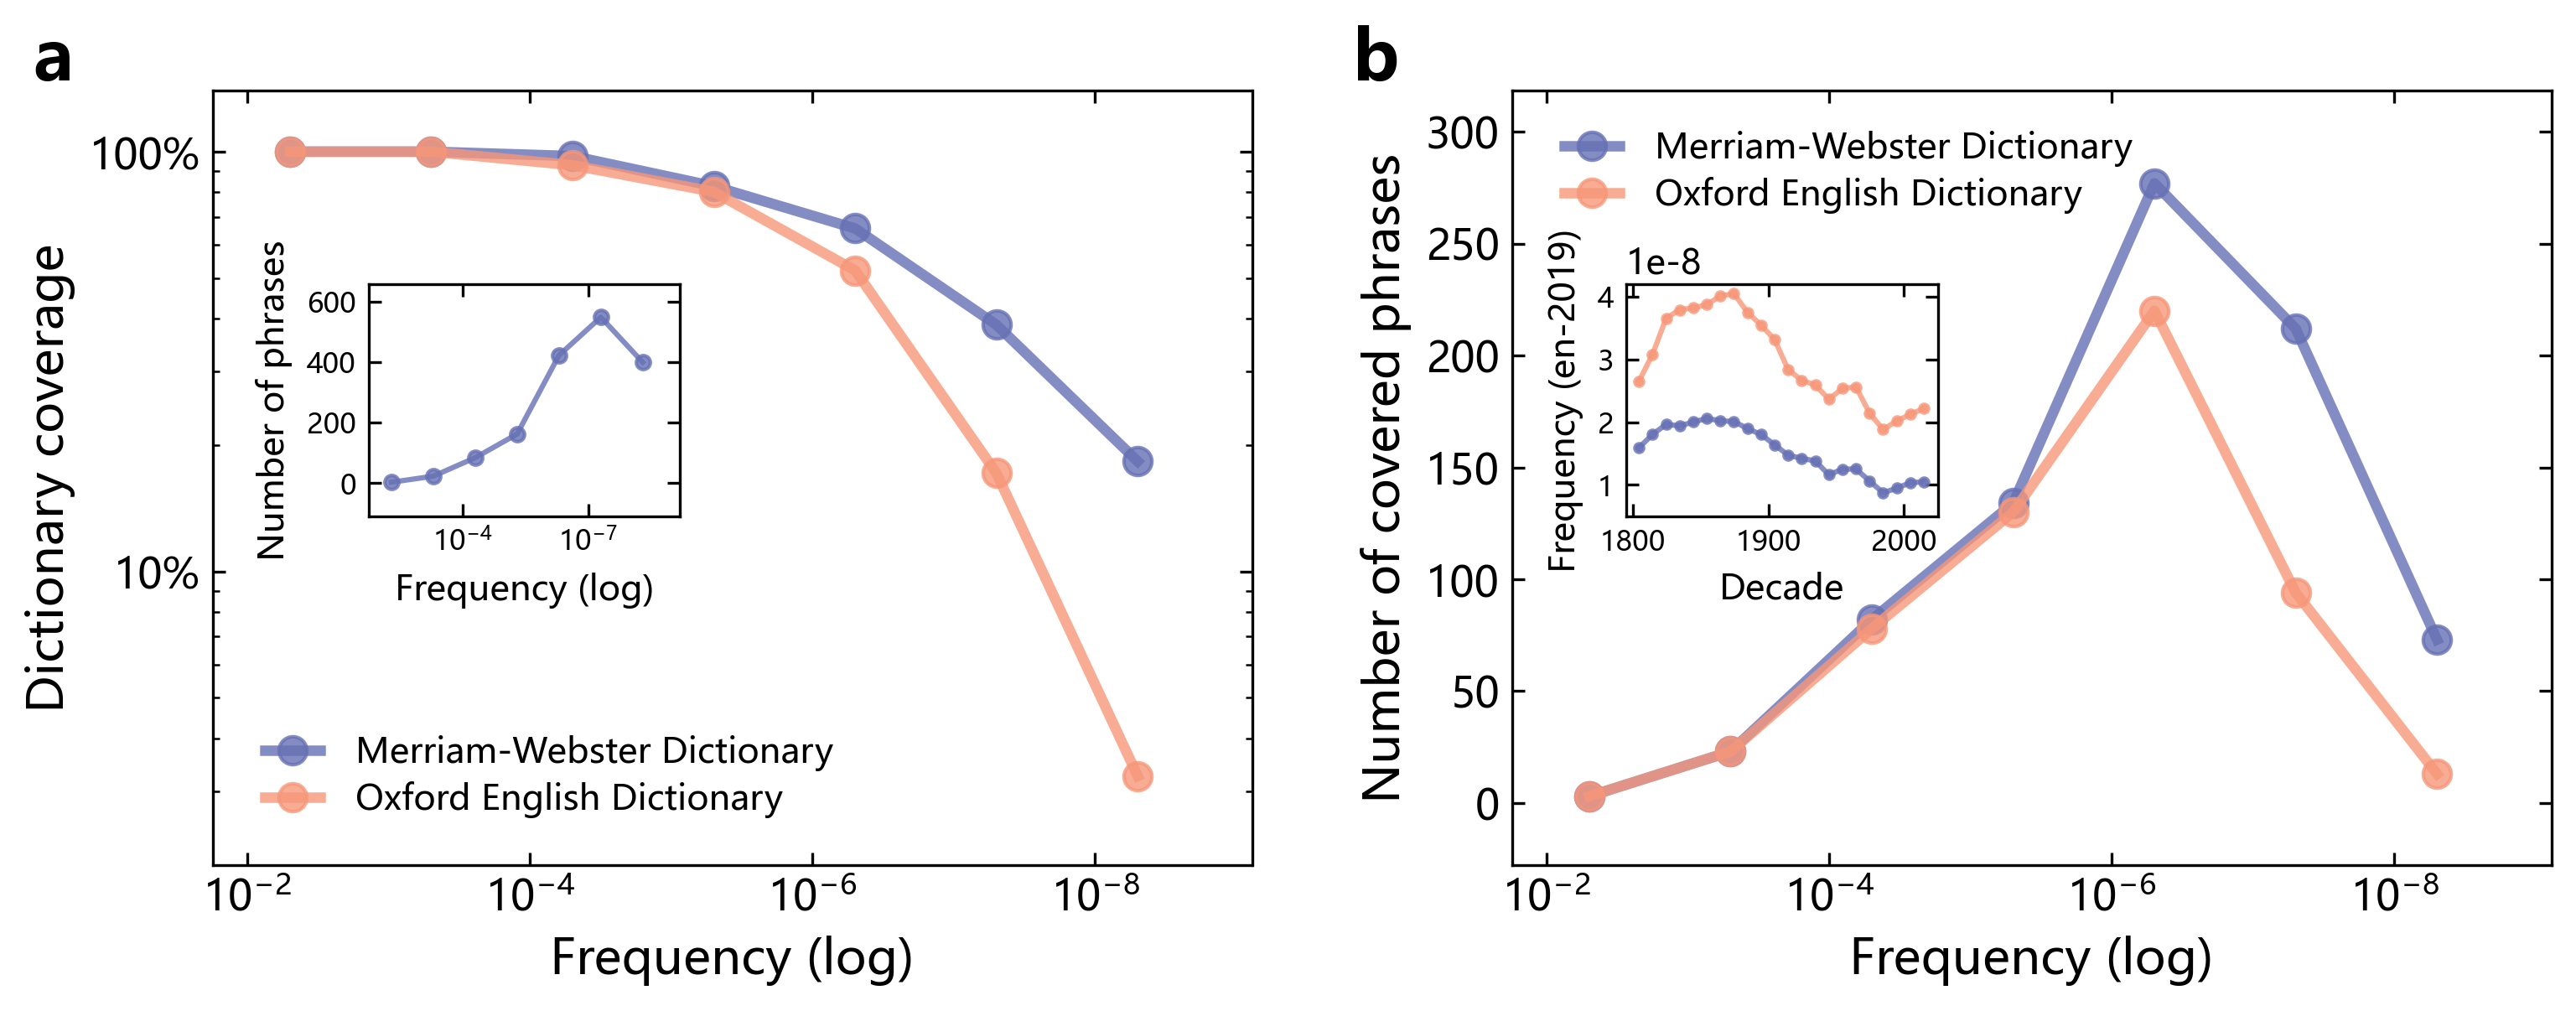

In [7]:
plt.rcParams['figure.dpi'] = 300
fig, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [1, 1]})
# colors = ['#f79779', '#6671b5']
colors = ['#6671b5', '#f79779']
# colors = ['#3a1e99', '#e69f00']
label_messages = ['Merriam-Webster Dictionary', 'Oxford English Dictionary']
plotSubpanelA(axs[0], center_of_bins, coverage_of_bins, frequency_of_bins, colors, label_messages)
plotSubpanelB(axs[1], center_of_bins, coverage_of_bins, frequency_of_bins, colors, label_messages)

fig.subplots_adjust(wspace=0.25, hspace=0.22)
# 添加字母
fig.text(0.0655, 0.945, 'a', fontsize=20, va='top', fontweight='bold')
fig.text(0.503, 0.945, 'b', fontsize=20, va='top', fontweight='bold')
# plt.savefig('utils/images/svg/dictionary coverage.svg', format='svg')